In [5]:
from PIL import Image

from keras.layers import Input, Dense, Layer
from keras.models import Model
from keras.constraints import Constraint
from keras.regularizers import Regularizer

from keras import backend as K
from keras import regularizers

import tensorflow as tf
from tensorflow import keras
from tensorflow import set_random_seed

import numpy as np
from numpy.random import seed
import os
import sys

import matplotlib.pyplot as plt
from matplotlib.cm import *
from matplotlib.pyplot import imshow

import seaborn as sns

import sklearn as sk
from sklearn import feature_extraction
import networkx as nx

seed(1)
set_random_seed(1)
print(keras.__version__)

2.2.4-tf


In [6]:
SYS_PATH_ADD_DIR = "/home/dhw3172/projects/water"
sys.path.append( os.path.join(SYS_PATH_ADD_DIR, "Python") )
from GenlassoAutoencoder import *
print(ROOT_DIR)

/home/dhw3172/projects/water


# Data input

In [8]:
rast=readImage()
arr= readNpArray()
tens=readTensor()
rastSizeTransposed=arr.shape

There are 1296 pixels - dim - (48, 27) in the image /home/dhw3172/projects/water/Data/GeoData/Raster/DEM/MtlPoin_Sain_VillElev.tif
There are 1296 pixels - dim - (48, 27) in the image /home/dhw3172/projects/water/Data/GeoData/Raster/DEM/MtlPoin_Sain_VillElev.tif
There are 1296 pixels - dim - (48, 27) in the image /home/dhw3172/projects/water/Data/GeoData/Raster/DEM/MtlPoin_Sain_VillElev.tif


In [43]:
modelL1Fused = tf.keras.Sequential([
    PiecewiseConstant(input_shape=rastSizeTransposed,
                    kernel_regularizer = fused_l1_with_reg_lasso_cls( rast, penWeightLassoStd=0, penWeightLassoFused=0)  )
])

There are 2517 edges in the lattice graph
Here is the dim(?, 27, 48)


TypeError: in converted code:
    relative to /home/dhw3172:

    projects/water/Python/GenlassoAutoencoder/genlassoKeras.py:107 call *
        return( K.multiply( self.kernel, K.ones(x.shape[0],x.shape[1]) ) )
    anaconda3/envs/pyAudio37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:733 ones *
        tf_dtype = tf.as_dtype(dtype)
    anaconda3/envs/pyAudio37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:712 as_dtype
        return _ANY_TO_TF[type_value]

    TypeError: unhashable type: 'Dimension'


# Tests with calling the piecewise constant layer with regularization

In [10]:
randMat = np.random.rand(rast.size[0], rast.size[1])
randMat[ randMat >= np.max(randMat) ] 
randMat[ randMat >= np.max(randMat) ]
randMat[randMat < np.max(randMat) ] = np.zeros( np.sum(randMat < np.max(randMat)) ) 
print(np.sum(randMat))
randMat

0.9985990885864799


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Regularization

### Zero weight - expect 0

In [11]:
f=fused_l1_with_reg_lasso_cls( rast, penWeightLassoStd=0, penWeightLassoFused=0)  
f(randMat)

There are 2517 edges in the lattice graph
In the fused_l1_with_reg_lasso_cls.__call__fct


0.0

### Lasso - expect lambda | np.max(randMat) |

In [12]:
f=fused_l1_with_reg_lasso_cls( rast, penWeightLassoStd=1, penWeightLassoFused=0)  
print(type(f))
f(randMat)


There are 2517 edges in the lattice graph
<class 'GenlassoAutoencoder.regularizationFunctions.fused_l1_with_reg_lasso_cls'>
In the fused_l1_with_reg_lasso_cls.__call__fct


<tf.Tensor 'add:0' shape=() dtype=float64>

### Fused lasso

## Layer

In [26]:
a= PiecewiseConstant(input_shape=rastSizeTransposed,
                    kernel_regularizer = fused_l1_with_reg_lasso_cls( rast, penWeightLassoStd=0, penWeightLassoFused=0)  )

a()

There are 2517 edges in the lattice graph


TypeError: __call__() missing 1 required positional argument: 'inputs'

In [ ]:
"""
tensTransposed=np.transpose( tens[0] )
tensTransposed=tensTransposed[np.newaxis, ... ]
tensTransposed.shape
tensTransposed[0].shape


tf.multiply(tf.ones((27, 48)), tf.ones((27, 48))).shape
tf.newaxis
"""

# Build the model 

In [29]:
 #Compile and fit the model
modelL1Fused.compile(optimizer='adam',
             loss='mean_squared_error')

In [39]:
modelL1FusedFit=modelL1Fused.fit(x=tens, y=tens, epochs=1000, verbose=0)

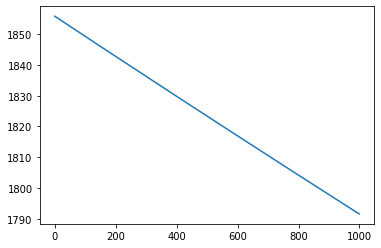

In [41]:
plt.plot(modelL1FusedFit.epoch, modelL1FusedFit.history["loss"])

In [42]:
modelL1Fused.predict(arr[np.newaxis,...]).shape

(1, 27, 48)

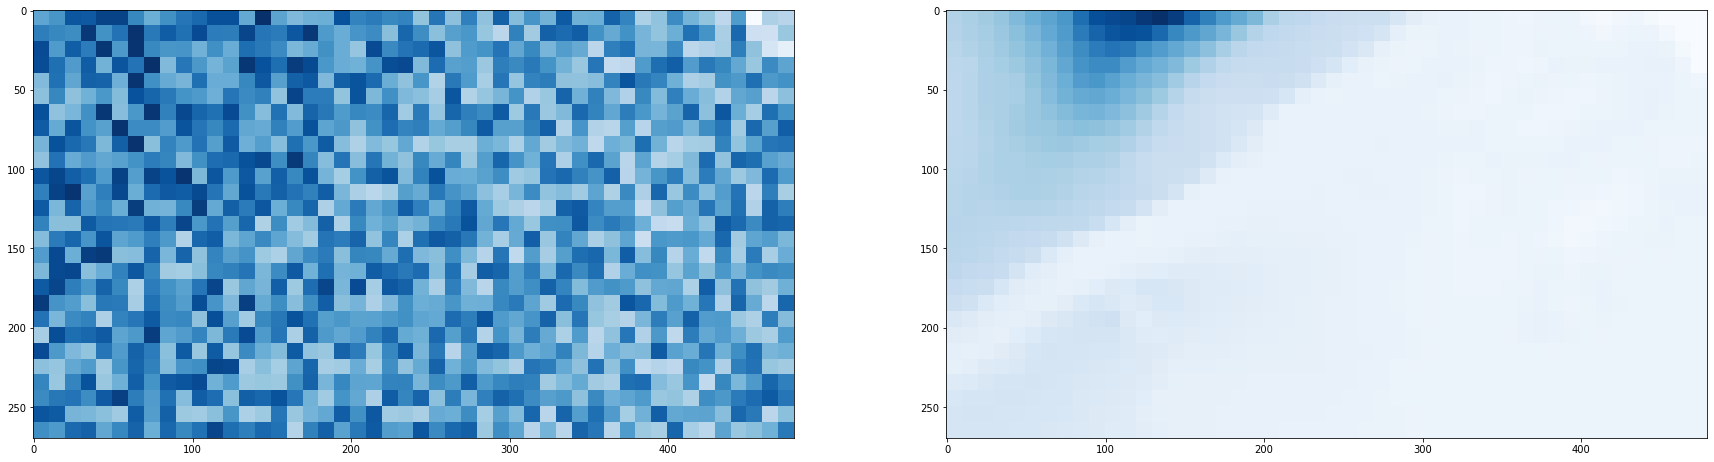

In [43]:

plt.subplot(1,2,1)
imgPred1=normalizePlotImg(modelL1Fused.predict(arr[np.newaxis,...])[0],fact=10)
plt.imshow(imgPred1)
    
plt.subplot(1,2,2)
imgOrig=normalizePlotImg(arr,fact=10)
plt.imshow(imgOrig)

fig = plt.gcf()

fig.set_size_inches(30,25)